#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [11]:
!conda install mysql-connector-python --yes

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [13]:
import datetime
import mysql.connector
import matplotlib.pyplot as plt
import pandas as pd
from mysql.connector.connection import MySQLConnection

In [59]:
con = mysql.connector.connect(user='user1', password='7oygWy6P', host='3.68.62.36', database='employees')

cursor = con.cursor()



1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [37]:
sql = """
SELECT YEAR(hire_date) AS hire_year, COUNT(*) AS employee_count
FROM employees
GROUP BY hire_year
ORDER BY hire_year;
"""

df = pd.read_sql(sql, con)
con.close()
df


/var/folders/81/2ddflf315k3c6pyg5gm3rfs80000gn/T/ipykernel_43332/357112516.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql, con)


,hire_year,employee_count
0,1985,35316
1,1986,36150
2,1987,33501
3,1988,31436
4,1989,28394
5,1990,25610
6,1991,22568
7,1992,20402
8,1993,17772
9,1994,14835


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити аби в pandas, або в SQL.

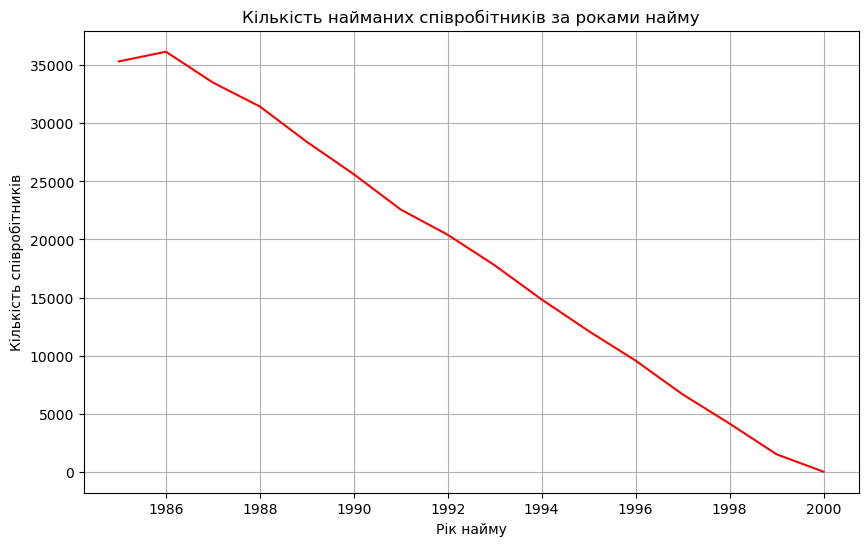

In [47]:
# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(df['hire_year'], df['employee_count'], linestyle='-', color='r')

# Додавання підписів
plt.title('Кількість найманих співробітників за роками найму')
plt.xlabel('Рік найму')
plt.ylabel('Кількість співробітників')
plt.grid(True)

# Відображення графіка
plt.show();


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [61]:
sql_3 = """
SELECT 
    emp_no,from_date, to_date,
    TIMESTAMPDIFF(YEAR, from_date, to_date) AS years_in_position
FROM 
    titles
WHERE 
    title = 'Engineer'
    AND to_date != '9999-01-01';
"""

df_years = pd.read_sql(sql_3, con)

# Закриття з'єднання
con.close()
df_years

/var/folders/81/2ddflf315k3c6pyg5gm3rfs80000gn/T/ipykernel_43332/2604868037.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_years = pd.read_sql(sql_3, con)


,emp_no,from_date,to_date,years_in_position
0,10004,1986-12-01,1995-12-01,9
1,10009,1990-02-18,1995-02-18,5
2,10012,1992-12-18,2000-12-18,8
3,10018,1987-04-03,1995-04-03,8
4,10026,1995-03-20,2001-03-19,5
...,...,...,...,...
84015,499972,1989-11-23,1998-11-23,9
84016,499984,1989-07-30,1994-07-30,5
84017,499994,1993-02-22,1993-10-27,0
84018,499996,1996-05-13,2002-05-13,6


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

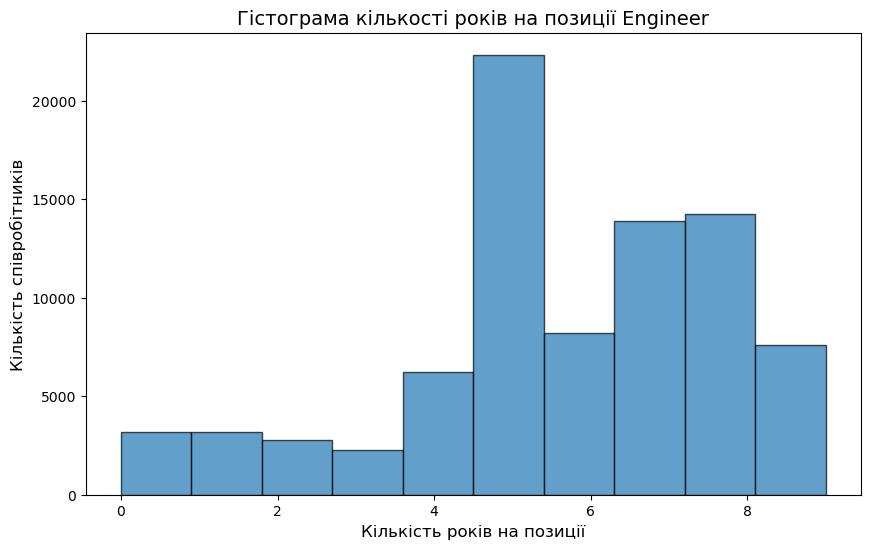

In [65]:
plt.figure(figsize=(10, 6))
plt.hist(df_years['years_in_position'], bins=10, edgecolor='black', alpha=0.7)

# Додавання назв та підписів
plt.title('Гістограма кількості років на позиції Engineer', fontsize=14)
plt.xlabel('К-сть років на позиції', fontsize=12)
plt.ylabel('Кількість співробітників', fontsize=12)

# Відображення діаграми
#plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [ ]:
con.close()